 ## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from pandasql import sqldf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the datasets

In [2]:
df1 = pd.read_csv("Table S1.csv", skiprows=1, header = 0)
df2 = pd.read_csv("Table S2.csv", skiprows=1, header = 0)
df3 = pd.read_csv("Table S3.csv", skiprows=1, header = 0)

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2988, 28)
(418, 24)
(52, 25)


### Checking for class imbalance

In [4]:
df1['Comment'].value_counts()

Barren       1687
Fertility    1301
Name: Comment, dtype: int64

In [5]:
# sampling the data
df1.sample(3)

CITATION  \
1310  [22660] WANG SONGJIE (2019)   
2823        Reid et al., 2011 CMP   
105    [19321] DAI JIN-GEN (2015)   

                                               LOCATION  LATITUDE (MIN.)  \
1310  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA -  M...          37.0000   
2823                                             Bishop              NaN   
105   CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...          29.1317   

      LONGITUDE (MIN.)     ROCK NAME  AGE(MA)  Cu_tonnage_Mt Comment  Feature  \
1310          118.0000      ANDESITE   109.00            NaN  Barren        0   
2823               NaN  BT4_246_g8s2     0.76            NaN  Barren        0   
105            88.6217     NOT GIVEN   131.00            NaN  Barren        0   

             Ti  ...          Dy          Ho          Er          Tm  \
1310  18.000000  ...  183.510000   68.350000  349.470000   76.450000   
2823   4.010768  ...  444.115156  183.357259  810.411853  174.565855   
105   11.720000  ...  139.870000   53.800000  279.960000   74.240000   

               Yb          Lu            Y           Hf            U  \
1310   877.990000  167.230000  2343.000000  33421.00000   429.000000   
2823  1387.061835  291.484991  5485.205537  12003.34769  4488.296706   
105    921.340000  129.460000  1675.140000  10775.55000   113.380000   

               Th  
1310   419.000000  
2823  3046.852185  
105     90.460000  

[3 rows x 28 columns]

In [6]:
# Prints the columns present in the dataframe
df1.columns

Index(['CITATION', 'LOCATION', 'LATITUDE (MIN.)', 'LONGITUDE (MIN.)',
       'ROCK NAME', 'AGE(MA)', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [7]:
df2.columns

Index(['Sample No.', 'Rock type', 'Zricon ID', 'Age', 'Ti', 'Ce', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [8]:
df2.sample(3)

Sample No.           Rock type   Zricon ID     Age   Ti    Ce     Nd  \
118      SM056  Bethlehem porphyry   RLP2L6-20  209.00  4.2  4.78  0.640   
223      SM058    Bethlehem facies  RLP1L2-17B  209.17  5.1  5.76  0.184   
252      SM057                FQPC   RLP1L3-18  208.00  6.9  7.65  0.620   

       Sm     Eu    Gd  ...     Tm     Yb     Lu      Y     Hf     Ce_zhong  \
118  1.61  0.495  7.10  ...  13.80  148.0  34.00  364.0   9460   246.897279   
223  0.48  0.159  3.34  ...   8.67   94.7  22.38  212.0  10082  1800.485854   
252  1.36  0.498  7.21  ...  15.55  155.9  34.63  425.9   9952   466.957800   

     Eu_zhong  Eu_Zhong/Y      Ce/Nd  (Ce/Nd)/Y  
118  0.413267    0.001135   7.468750   0.020519  
223  0.333546    0.001573  31.304348   0.147662  
252  0.408401    0.000959  12.338710   0.028971  

[3 rows x 24 columns]

In [9]:
df3.columns

Index(['Sample', 'Analysis number', 'Location', 'Age (Ma)', 'Ti', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [10]:
df3.sample(3)

Sample Analysis number Location  Age (Ma)        Ti      Ce      Pr  \
40  JR11-06       JR11-06_9     Jiru        16  4.945778  120.60  0.2985   
20  JM11-36       JM11-36_4    Jiama        17  2.516041   26.38  0.0809   
37  JR11-06       JR11-06_2     Jiru        16  4.465105   21.32  0.0657   

        Nd     Sm     Eu  ...     Tm     Yb      Lu       Y            Hf  \
40  4.6410  9.949  3.874  ...  49.42  442.2   64.71  1584.0   9039.477435   
20  0.9649  1.987  1.137  ...  41.79  524.2  120.30   878.7  12490.760100   
37  1.6330  3.372  1.730  ...  33.25  327.0   56.68  1135.0   9885.762470   

       Ce_zhong  Eu_zhong  Eu_Zhong/Y      Ce/Nd  (Ce/Nd)/Y  
40   345.535383  0.528370    0.000334  25.985779   0.016405  
20  2003.245569  0.525509    0.000598  27.339621   0.031114  
37   343.990474  0.543449    0.000479  13.055726   0.011503  

[3 rows x 25 columns]

### Analysing the column Sample No in dataframes 2 and 3.

In [11]:
df2['Sample No.'].value_counts()

MA026    57
SM060    46
SM061    39
MA121    30
SM056    29
SB123    28
SM057    27
SM058    25
MA038    23
SB217    23
MA099    22
SB218    21
SM055    20
SM059    18
KB132    10
Name: Sample No., dtype: int64

In [12]:
df3['Sample'].value_counts()

PZ11-03     9
PG11-03     6
NM11-01     5
WR-12-11    5
KMQ-12-2    5
JM11-36     5
PG11-06     5
JR11-06     4
QS-11       3
JR-2        3
JR-5        2
Name: Sample, dtype: int64

### Working with dataframe 1

In [13]:
# Print the first 5 rows of the dataframe
df1.head()

CITATION  \
0  [19221] ZHAO SHAO-QING (2015)   
1  [19221] ZHAO SHAO-QING (2015)   
2  [19221] ZHAO SHAO-QING (2015)   
3  [19221] ZHAO SHAO-QING (2015)   
4  [19221] ZHAO SHAO-QING (2015)   

                                            LOCATION  LATITUDE (MIN.)  \
0  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...             33.0   
1  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...             33.0   
2  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...             33.0   
3  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...             33.0   
4  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...             33.0   

   LONGITUDE (MIN.) ROCK NAME  AGE(MA)  Cu_tonnage_Mt Comment  Feature     Ti  \
0              95.0    DACITE    222.0            NaN  Barren        0   7.88   
1              95.0    DACITE    222.0            NaN  Barren        0  10.90   
2              95.0    DACITE    222.0            NaN  Barren        0   6.00   
3              95.0    DACITE    222.0            NaN  Barren        0   9.06   
4              95.0    DACITE    222.0            NaN  Barren        0   4.93   

   ...     Dy     Ho     Er     Tm      Yb     Lu       Y       Hf      U  \
0  ...  295.0  125.0  526.0  129.0  1077.0  199.0  2737.0  12390.0  305.0   
1  ...  361.0  147.0  611.0  148.0  1232.0  228.0  3226.0  12591.0  503.0   
2  ...  415.0  172.0  701.0  167.0  1358.0  248.0  3675.0  12724.0  639.0   
3  ...  194.0   83.0  356.0   89.5   762.0  144.0  1832.0  12894.0  308.0   
4  ...  257.0  108.0  456.0  111.0   936.0  171.0  2355.0  12535.0  348.0   

      Th  
0  134.0  
1  272.0  
2  414.0  
3  127.0  
4  155.0  

[5 rows x 28 columns]

In [14]:
### Number of Cu deposits based on location

In [15]:
#group_by_loc = sqldf(""" SELECT LOCATION AS location, COUNT(*) AS num_deposits FROM df1 GROUP BY LOCATION ORDER BY LOCATION """)

In [16]:
import pandas as pd

# Assuming df1 is your DataFrame
# Here's how you can achieve the same functionality using pandas
group_by_loc = df1.groupby('LOCATION').size().reset_index(name='num_deposits').sort_values(by='LOCATION')

print(group_by_loc)


                                             LOCATION  num_deposits
0   ALEUTIAN ARC / CENTRAL ALEUTIAN ARC / ADAK / H...            11
1                                             Aktogai             8
2   BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...           168
3                                             Baogutu             6
4                                          Batu Hijau            63
..                                                ...           ...
59                                       Tuwu-Yandong            29
60  YANGTZE BLOCK / YANGTZE BLOCK_SOUTHERN SEGMENT...           107
61                                        Yellowstone            18
62                                  Younger Toba Tuff            20
63                                             Yulong            90

[64 rows x 2 columns]


In [17]:
group_by_loc

LOCATION  num_deposits
0   ALEUTIAN ARC / CENTRAL ALEUTIAN ARC / ADAK / H...            11
1                                             Aktogai             8
2   BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...           168
3                                             Baogutu             6
4                                          Batu Hijau            63
..                                                ...           ...
59                                       Tuwu-Yandong            29
60  YANGTZE BLOCK / YANGTZE BLOCK_SOUTHERN SEGMENT...           107
61                                        Yellowstone            18
62                                  Younger Toba Tuff            20
63                                             Yulong            90

[64 rows x 2 columns]

### Null Values

In [18]:
df1.isnull().sum().sort_values(ascending=False)

Cu_tonnage_Mt       1687
LATITUDE (MIN.)     1522
LONGITUDE (MIN.)    1522
La                   923
Pr                   256
Ti                   255
ROCK NAME            124
AGE(MA)              124
Nd                    93
Er                    79
Tm                    78
Y                     74
Hf                    25
Eu                    15
Sm                     8
Gd                     6
Ce                     5
Dy                     3
Lu                     2
Tb                     1
Ho                     1
Yb                     1
U                      0
CITATION               0
LOCATION               0
Feature                0
Comment                0
Th                     0
dtype: int64

<Axes: title={'center': 'Heatmap of missing values in the dataset'}>

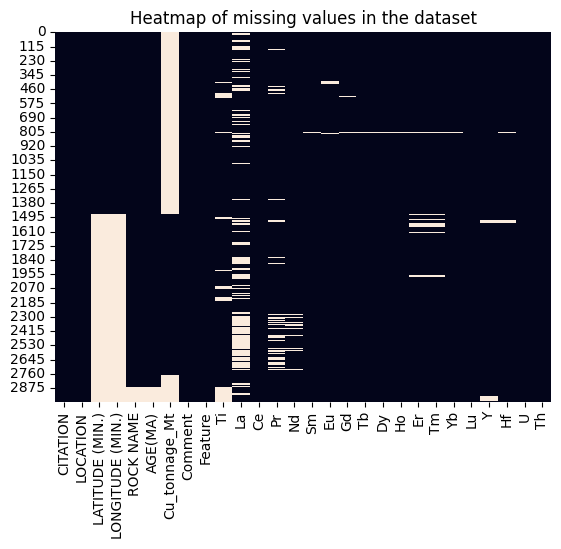

In [19]:
plt.title("Heatmap of missing values in the dataset")
sns.heatmap(df1.isnull(), cbar=False)

### Renaming the columns for ease of working

In [20]:
df1.rename(columns = {'LOCATION': 'location', 
                      'LATITUDE (MIN.)':'latitude', 
                      'LONGITUDE (MIN.)':'longitude', 
                      'ROCK NAME':'rock_name', 
                      'AGE(MA)':'age_ma'}, inplace=True)

In [21]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [22]:
### Checking the latitude column for null values

In [23]:
#null_lat_rec = sqldf("""
 #                       SELECT location, COUNT(*)
  #                      FROM df1
   ###
      #               """)

In [24]:
import pandas as pd

# Assuming df1 is your DataFrame
# You may need to replace 'df1' with the actual name of your DataFrame
null_lat_rec = df1[df1['latitude'].isnull()].groupby('location').size().reset_index(name='count')


In [25]:
null_lat_rec

location  count
0             Aktogai      8
1             Baogutu      6
2          Batu Hijau     63
3              Bishop     19
4               Borly      5
5           Bozshakol     17
6        Chuquicamata     30
7    Chuquicamata-Rad    123
8              Dexing     48
9             El Abra      9
10        El Salvador     61
11        El Teniente     37
12           Erdenet       8
13             Heruga    208
14       Hugo Dummett    252
15              Jiama     42
16             Koksai      5
17            Kounrad     12
18  NChuquicamata-Rad      1
19         Nurkazghan     10
20             Opache     20
21         Oyu Tolgoi     66
22            Qulong      30
23     Radomiro Tomic     20
24          Red Chris     80
25       Sar Cheshmeh     50
26         Shujiadian     14
27             Sungun     45
28           Tampakan     51
29            Tintaya     25
30       Tuwu-Yandong     29
31        Yellowstone     18
32  Younger Toba Tuff     20
33             Yulong     90

In [26]:
null_lat_rec

location  count
0             Aktogai      8
1             Baogutu      6
2          Batu Hijau     63
3              Bishop     19
4               Borly      5
5           Bozshakol     17
6        Chuquicamata     30
7    Chuquicamata-Rad    123
8              Dexing     48
9             El Abra      9
10        El Salvador     61
11        El Teniente     37
12           Erdenet       8
13             Heruga    208
14       Hugo Dummett    252
15              Jiama     42
16             Koksai      5
17            Kounrad     12
18  NChuquicamata-Rad      1
19         Nurkazghan     10
20             Opache     20
21         Oyu Tolgoi     66
22            Qulong      30
23     Radomiro Tomic     20
24          Red Chris     80
25       Sar Cheshmeh     50
26         Shujiadian     14
27             Sungun     45
28           Tampakan     51
29            Tintaya     25
30       Tuwu-Yandong     29
31        Yellowstone     18
32  Younger Toba Tuff     20
33             Yulong     90

In [27]:
coordinates_map = {
    'Aktogai':[46, 80],
    'Baogutu':[45, 84],
    'Batu Hijau':[-9, 117],
    'Bishop':[37, -118],
    'Borly':[48, -76],
    'Bozshakol':[51, 72],
    'Chuquicamata':[-22, -67],
    'Chuquicamata-Rad':[-22, -67],
    'Dexing':[28, 117],
    'El Abra':[-22, -68],
    'El Salvador':[-26, -70],
    'El Teniente':[-34, -70],
    'Erdenet':[49, 104],
    'Heruga':[43, 106],
    'Hugo Dummett':[43, 106],
    'Jiama':[35, 105],
    'Koksai':[44, 78],
    'Kounrad':[47, 75],
    'NChuquicamata-Rad':[-22, -67],
    'Nurkazghan':[50, 73],
    'Opache':[-22, -67],
    'Oyu Tolgoi':[43, 106],
    'Qulong':[30, 92],
    'Radomiro Tomic':[-22, -67],
    'Red Chris':[58, -130],
    'Sar Cheshmeh':[30, 56],
    'Shujiadian':[33, 110],
    'Sungun':[38, 46],
    'Tampakan':[6, 125],
    'Tintaya':[-15, -71],
    'Tuwu-Yandong':[42, 93],
    'Yellowstone':[45, 111],
    'Younger Toba Tuff':[3, 99],
    'Yulong':[31, 98]
}

In [28]:
### Functions to fill missing latitude and longitude values

In [29]:
def set_latitude(location):
    return coordinates_map[location][0]

def set_longitude(location):
    return coordinates_map[location][1]

In [30]:
df1['location'] = df1['location'].apply(str.strip)

In [31]:
null_latitude_rec = df1[df1['latitude'].isnull()]
null_latitude_rec

CITATION          location  latitude  longitude rock_name  \
1466       Shen et al. 2015             Borly       NaN        NaN      Gr-1   
1467       Shen et al. 2015             Borly       NaN        NaN      Gr-2   
1468       Shen et al. 2015             Borly       NaN        NaN      Gr-6   
1469       Shen et al. 2015             Borly       NaN        NaN      Gr-9   
1470       Shen et al. 2015             Borly       NaN        NaN     Gr-10   
...                     ...               ...       ...        ...       ...   
2983  Ballard et al. (2002)  Chuquicamata-Rad       NaN        NaN       NaN   
2984  Ballard et al. (2002)  Chuquicamata-Rad       NaN        NaN       NaN   
2985  Ballard et al. (2002)  Chuquicamata-Rad       NaN        NaN       NaN   
2986  Ballard et al. (2002)  Chuquicamata-Rad       NaN        NaN       NaN   
2987  Ballard et al. (2002)  Chuquicamata-Rad       NaN        NaN       NaN   

      age_ma  Cu_tonnage_Mt    Comment  Feature     Ti  ...     Dy    Ho  \
1466   316.0            0.6  Fertility        1   8.64  ...   86.5  32.1   
1467   316.0            0.6  Fertility        1   9.92  ...  119.0  43.7   
1468   316.0            0.6  Fertility        1  10.90  ...   83.3  32.6   
1469   316.0            0.6  Fertility        1   5.60  ...  104.0  37.8   
1470   316.0            0.6  Fertility        1  16.20  ...   49.9  18.8   
...      ...            ...        ...      ...    ...  ...    ...   ...   
2983     NaN            NaN     Barren        0    NaN  ...   40.9  14.6   
2984     NaN            NaN     Barren        0    NaN  ...   69.5  23.4   
2985     NaN            NaN     Barren        0    NaN  ...   69.2  22.9   
2986     NaN            NaN     Barren        0    NaN  ...   34.2  12.5   
2987     NaN            NaN     Barren        0    NaN  ...   51.7  17.9   

         Er    Tm     Yb     Lu       Y      Hf      U     Th  
1466    NaN   NaN  409.0   83.0  1049.0  9740.0  494.0  342.0  
1467    NaN   NaN  527.0  102.0  1408.0  9690.0  625.0  495.0  
1468    NaN   NaN  421.0   86.0  1061.0  9320.0  509.0  338.0  
1469    NaN   NaN  444.0   86.0  1292.0  9010.0  321.0  319.0  
1470    NaN   NaN  203.0   37.0   613.0  9550.0  181.0  123.0  
...     ...   ...    ...    ...     ...     ...    ...    ...  
2983   65.3  14.9  137.0   24.8   448.0  8803.0   92.0   66.0  
2984  102.9  21.9  199.0   34.7   725.0  8854.0  100.0   90.0  
2985   99.7  21.2  191.0   33.0   693.0  8890.0   97.0   86.0  
2986   58.2  12.9  123.0   21.9   394.0  9032.0   82.0   55.0  
2987   81.5  17.9  166.0   28.8   564.0  8773.0   90.0   73.0  

[1522 rows x 28 columns]

### Invoking the functions to replace missing latitudes and longitudes

In [32]:
null_latitude_rec['latitude'] = null_latitude_rec['latitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_latitude))

null_latitude_rec['longitude'] = null_latitude_rec['longitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_longitude))

In [33]:
null_latitude_rec

CITATION          location  latitude  longitude rock_name  \
1466       Shen et al. 2015             Borly      48.0      -76.0      Gr-1   
1467       Shen et al. 2015             Borly      48.0      -76.0      Gr-2   
1468       Shen et al. 2015             Borly      48.0      -76.0      Gr-6   
1469       Shen et al. 2015             Borly      48.0      -76.0      Gr-9   
1470       Shen et al. 2015             Borly      48.0      -76.0     Gr-10   
...                     ...               ...       ...        ...       ...   
2983  Ballard et al. (2002)  Chuquicamata-Rad     -22.0      -67.0       NaN   
2984  Ballard et al. (2002)  Chuquicamata-Rad     -22.0      -67.0       NaN   
2985  Ballard et al. (2002)  Chuquicamata-Rad     -22.0      -67.0       NaN   
2986  Ballard et al. (2002)  Chuquicamata-Rad     -22.0      -67.0       NaN   
2987  Ballard et al. (2002)  Chuquicamata-Rad     -22.0      -67.0       NaN   

      age_ma  Cu_tonnage_Mt    Comment  Feature     Ti  ...     Dy    Ho  \
1466   316.0            0.6  Fertility        1   8.64  ...   86.5  32.1   
1467   316.0            0.6  Fertility        1   9.92  ...  119.0  43.7   
1468   316.0            0.6  Fertility        1  10.90  ...   83.3  32.6   
1469   316.0            0.6  Fertility        1   5.60  ...  104.0  37.8   
1470   316.0            0.6  Fertility        1  16.20  ...   49.9  18.8   
...      ...            ...        ...      ...    ...  ...    ...   ...   
2983     NaN            NaN     Barren        0    NaN  ...   40.9  14.6   
2984     NaN            NaN     Barren        0    NaN  ...   69.5  23.4   
2985     NaN            NaN     Barren        0    NaN  ...   69.2  22.9   
2986     NaN            NaN     Barren        0    NaN  ...   34.2  12.5   
2987     NaN            NaN     Barren        0    NaN  ...   51.7  17.9   

         Er    Tm     Yb     Lu       Y      Hf      U     Th  
1466    NaN   NaN  409.0   83.0  1049.0  9740.0  494.0  342.0  
1467    NaN   NaN  527.0  102.0  1408.0  9690.0  625.0  495.0  
1468    NaN   NaN  421.0   86.0  1061.0  9320.0  509.0  338.0  
1469    NaN   NaN  444.0   86.0  1292.0  9010.0  321.0  319.0  
1470    NaN   NaN  203.0   37.0   613.0  9550.0  181.0  123.0  
...     ...   ...    ...    ...     ...     ...    ...    ...  
2983   65.3  14.9  137.0   24.8   448.0  8803.0   92.0   66.0  
2984  102.9  21.9  199.0   34.7   725.0  8854.0  100.0   90.0  
2985   99.7  21.2  191.0   33.0   693.0  8890.0   97.0   86.0  
2986   58.2  12.9  123.0   21.9   394.0  9032.0   82.0   55.0  
2987   81.5  17.9  166.0   28.8   564.0  8773.0   90.0   73.0  

[1522 rows x 28 columns]

In [34]:
df1.loc[null_latitude_rec.index, 'latitude'] = null_latitude_rec['latitude']
df1.loc[null_latitude_rec.index, 'longitude'] = null_latitude_rec['longitude']

In [35]:
print('Latitude nulls: ', df1['latitude'].isna().sum())
print('Longitude nulls: ', df1['longitude'].isna().sum())

Latitude nulls:  0
Longitude nulls:  0


### Replace "Cu_Tonnage" for Barren ores with 0.0

In [36]:
df1.loc[df1['Comment'] == 'Barren', 'Cu_tonnage_Mt'] = 0.0

### Just the trace elements left for handling nulls

In [37]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
rock_name        124
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
CITATION           0
location           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
latitude           0
Th                 0
dtype: int64

In [39]:
result

Comment        La        Pr         Ti      age_ma         Nd  \
0     Barren  5.496975  2.803270  38.320030  556.602423  12.349263   
1  Fertility  0.234889  0.123007   6.714327  201.778094   1.367614   

           Er         Tm            Y            Hf        Eu         Sm  \
0  320.348590  72.562911  2154.694014  11113.827390  1.481066  11.697207   
1  125.670413  30.266185   769.383452   8854.285237  1.016840   2.535607   

          Gd         Ce          Dy          Lu          Yb         Tb  \
0  47.258081  35.642595  213.756964  121.309176  649.943063  18.653674   
1  15.371648  21.207080   54.388516   66.430931  325.240032   6.329784   

          Ho  
0  74.816806  
1  29.417486

### Mean Values of trace elements based on type of ore: Barren or Fertility

In [40]:
#sqldf("""
 #           
  #        SELECT Comment, AVG(La), AVG(Pr), AVG(Ti), AVG(age_ma), AVG(Nd), AVG(Er), AVG(Tm), AVG(Y), AVG(Hf),
   #                       AVG(Eu), AVG(Sm), AVG(Gd), AVG(Ce), AVG(Dy), AVG(Lu), AVG(Yb), AVG(Tb), AVG(Ho)
    #      FROM df1
     #     GROUP BY Comment
      #  
      #""")

In [41]:
### Missing "rock_name" records belong to BARREN type.

In [42]:
#sqldf("""
 #           
  #          SELECT Comment, COUNT(*) AS count
   #         FROM df1
    #        WHERE rock_name IS NULL
     #       GROUP BY Comment

      #""")

In [43]:
df1.loc[df1['Comment'] == 'Barren'].head(2)

CITATION  \
0  [19221] ZHAO SHAO-QING (2015)   
1  [19221] ZHAO SHAO-QING (2015)   

                                            location  latitude  longitude  \
0  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...      33.0       95.0   
1  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...      33.0       95.0   

  rock_name  age_ma  Cu_tonnage_Mt Comment  Feature     Ti  ...     Dy     Ho  \
0    DACITE   222.0            0.0  Barren        0   7.88  ...  295.0  125.0   
1    DACITE   222.0            0.0  Barren        0  10.90  ...  361.0  147.0   

      Er     Tm      Yb     Lu       Y       Hf      U     Th  
0  526.0  129.0  1077.0  199.0  2737.0  12390.0  305.0  134.0  
1  611.0  148.0  1232.0  228.0  3226.0  12591.0  503.0  272.0  

[2 rows x 28 columns]

In [44]:
import pandas as pd

# Assuming df1 is your DataFrame
result1 = df1[df1['rock_name'].isnull()].groupby('Comment').size().reset_index(name='count')
print(result1)


  Comment  count
0  Barren    124


In [45]:
# Notice that a few of the Barren ores contain rock_name. A good approach is to fill the missing values with mode.
# In Addition, there is a category by the name "NOT GIVEN". We can even choose to replace nulls with it.

In [46]:
df1.loc[df1['Comment'] == 'Barren']['rock_name'].value_counts()

GRANITE              524
NOT GIVEN            214
GRANITE, RAPAKIVI    168
ANDESITE             107
GNEISS                88
                    ... 
RC13-78_56             1
RC13-78_34             1
RC13-78_33             1
RC13-78_31             1
TTZ1-58                1
Name: rock_name, Length: 115, dtype: int64

In [47]:
### All missing rock_name records belong to one location: "Chuquicamata-Rad"

In [48]:
df1.loc[df1['rock_name'].isnull()][['Comment', 'rock_name', 'age_ma', 'location']]

Comment rock_name  age_ma           location
2864  Barren       NaN     NaN  NChuquicamata-Rad
2865  Barren       NaN     NaN   Chuquicamata-Rad
2866  Barren       NaN     NaN   Chuquicamata-Rad
2867  Barren       NaN     NaN   Chuquicamata-Rad
2868  Barren       NaN     NaN   Chuquicamata-Rad
...      ...       ...     ...                ...
2983  Barren       NaN     NaN   Chuquicamata-Rad
2984  Barren       NaN     NaN   Chuquicamata-Rad
2985  Barren       NaN     NaN   Chuquicamata-Rad
2986  Barren       NaN     NaN   Chuquicamata-Rad
2987  Barren       NaN     NaN   Chuquicamata-Rad

[124 rows x 4 columns]

In [49]:
#sqldf("""
 #           SELECT location, age_ma, Comment, rock_name, latitude, longitude
  ###        
     #""")

In [50]:
import pandas as pd

# Assuming df1 is your DataFrame containing the data
# Replace df1 with the name of your DataFrame if different

# SQL query equivalent in pandas
result1 = df1.loc[df1['location'] == 'Chuquicamata', ['location', 'age_ma', 'Comment', 'rock_name', 'latitude', 'longitude']]

# Displaying the result
result1


location  age_ma    Comment rock_name  latitude  longitude
2139  Chuquicamata    35.0  Fertility    610-01     -22.0      -67.0
2140  Chuquicamata    35.0  Fertility    610-02     -22.0      -67.0
2141  Chuquicamata    35.0  Fertility    610-03     -22.0      -67.0
2142  Chuquicamata    35.0  Fertility    610-04     -22.0      -67.0
2143  Chuquicamata    35.0  Fertility    610-05     -22.0      -67.0
2144  Chuquicamata    35.0  Fertility    610-06     -22.0      -67.0
2145  Chuquicamata    35.0  Fertility    610-07     -22.0      -67.0
2146  Chuquicamata    35.0  Fertility    610-08     -22.0      -67.0
2147  Chuquicamata    35.0  Fertility    610-09     -22.0      -67.0
2148  Chuquicamata    35.0  Fertility    610-10     -22.0      -67.0
2149  Chuquicamata    35.0  Fertility    609-01     -22.0      -67.0
2150  Chuquicamata    35.0  Fertility    609-02     -22.0      -67.0
2151  Chuquicamata    35.0  Fertility    609-03     -22.0      -67.0
2152  Chuquicamata    35.0  Fertility    609-04     -22.0      -67.0
2153  Chuquicamata    35.0  Fertility    609-05     -22.0      -67.0
2154  Chuquicamata    35.0  Fertility    609-06     -22.0      -67.0
2155  Chuquicamata    35.0  Fertility    609-07     -22.0      -67.0
2156  Chuquicamata    35.0  Fertility    609-08     -22.0      -67.0
2157  Chuquicamata    35.0  Fertility    609-09     -22.0      -67.0
2158  Chuquicamata    35.0  Fertility    609-10     -22.0      -67.0
2159  Chuquicamata    35.0  Fertility    603-01     -22.0      -67.0
2160  Chuquicamata    35.0  Fertility    603-02     -22.0      -67.0
2161  Chuquicamata    35.0  Fertility    603-03     -22.0      -67.0
2162  Chuquicamata    35.0  Fertility    603-04     -22.0      -67.0
2163  Chuquicamata    35.0  Fertility    603-05     -22.0      -67.0
2164  Chuquicamata    35.0  Fertility    603-06     -22.0      -67.0
2165  Chuquicamata    35.0  Fertility    603-07     -22.0      -67.0
2166  Chuquicamata    35.0  Fertility    603-08     -22.0      -67.0
2167  Chuquicamata    35.0  Fertility    603-09     -22.0      -67.0
2168  Chuquicamata    35.0  Fertility    603-10     -22.0      -67.0

In [51]:
df1.loc[df1['location'] == 'NChuquicamata-Rad', 'location'] = 'Chuquicamata-Rad'

In [52]:
df1['location'].value_counts()

Hugo Dummett                                                                                                          252
Heruga                                                                                                                208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH                     168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET                                    150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX    144
                                                                                                                     ... 
Aktogai                                                                                                                 8
Erdenet                                                                                                                 8
Baogutu                 

In [53]:
### Age_ma missing values

In [54]:
#null_age = sqldf("""
 #                     SELECT location, Comment  
    #                  FROM df1
     #                 WHERE age_ma IS NULL
      #            """)

In [55]:
import pandas as pd

# Assuming df1 is your DataFrame
null_age = df1[df1['age_ma'].isnull()][['location', 'Comment']]


In [56]:
null_age['Comment'].value_counts()

Barren    124
Name: Comment, dtype: int64

In [57]:
null_age

location Comment
2864  Chuquicamata-Rad  Barren
2865  Chuquicamata-Rad  Barren
2866  Chuquicamata-Rad  Barren
2867  Chuquicamata-Rad  Barren
2868  Chuquicamata-Rad  Barren
...                ...     ...
2983  Chuquicamata-Rad  Barren
2984  Chuquicamata-Rad  Barren
2985  Chuquicamata-Rad  Barren
2986  Chuquicamata-Rad  Barren
2987  Chuquicamata-Rad  Barren

[124 rows x 2 columns]

In [58]:
null_age.index = range(len(null_age))
null_age

location Comment
0    Chuquicamata-Rad  Barren
1    Chuquicamata-Rad  Barren
2    Chuquicamata-Rad  Barren
3    Chuquicamata-Rad  Barren
4    Chuquicamata-Rad  Barren
..                ...     ...
119  Chuquicamata-Rad  Barren
120  Chuquicamata-Rad  Barren
121  Chuquicamata-Rad  Barren
122  Chuquicamata-Rad  Barren
123  Chuquicamata-Rad  Barren

[124 rows x 2 columns]

In [59]:
null_age['location'].value_counts()

Chuquicamata-Rad    124
Name: location, dtype: int64

In [60]:
df1['age_ma'].sample(20)

226      235.000000
295      326.420206
1699     170.000000
2642     370.000000
2597     370.000000
2724     370.000000
664      242.000000
904     1611.801512
1671     170.000000
1147    1633.000000
821     1645.240914
1956      16.000000
2856       0.074000
1561     490.000000
1030     123.190410
1700     170.000000
393      132.000000
1727      41.000000
312      297.631443
1575      16.000000
Name: age_ma, dtype: float64

### Plotting the Distributions

<Axes: xlabel='age_ma', ylabel='Density'>

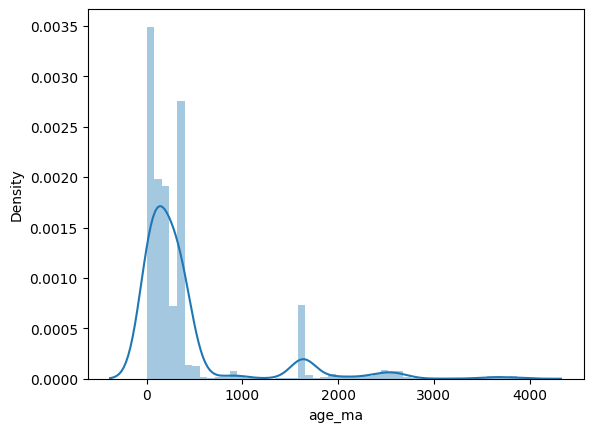

In [61]:
import seaborn as sns
sns.distplot(df1['age_ma'])

In [62]:
df1

CITATION  \
0     [19221] ZHAO SHAO-QING (2015)   
1     [19221] ZHAO SHAO-QING (2015)   
2     [19221] ZHAO SHAO-QING (2015)   
3     [19221] ZHAO SHAO-QING (2015)   
4     [19221] ZHAO SHAO-QING (2015)   
...                             ...   
2983          Ballard et al. (2002)   
2984          Ballard et al. (2002)   
2985          Ballard et al. (2002)   
2986          Ballard et al. (2002)   
2987          Ballard et al. (2002)   

                                               location  latitude  longitude  \
0     CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...      33.0       95.0   
1     CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...      33.0       95.0   
2     CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...      33.0       95.0   
3     CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...      33.0       95.0   
4     CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...      33.0       95.0   
...                                                 ...       ...        ...   
2983                                   Chuquicamata-Rad     -22.0      -67.0   
2984                                   Chuquicamata-Rad     -22.0      -67.0   
2985                                   Chuquicamata-Rad     -22.0      -67.0   
2986                                   Chuquicamata-Rad     -22.0      -67.0   
2987                                   Chuquicamata-Rad     -22.0      -67.0   

     rock_name  age_ma  Cu_tonnage_Mt Comment  Feature     Ti  ...     Dy  \
0       DACITE   222.0            0.0  Barren        0   7.88  ...  295.0   
1       DACITE   222.0            0.0  Barren        0  10.90  ...  361.0   
2       DACITE   222.0            0.0  Barren        0   6.00  ...  415.0   
3       DACITE   222.0            0.0  Barren        0   9.06  ...  194.0   
4       DACITE   222.0            0.0  Barren        0   4.93  ...  257.0   
...        ...     ...            ...     ...      ...    ...  ...    ...   
2983       NaN     NaN            0.0  Barren        0    NaN  ...   40.9   
2984       NaN     NaN            0.0  Barren        0    NaN  ...   69.5   
2985       NaN     NaN            0.0  Barren        0    NaN  ...   69.2   
2986       NaN     NaN            0.0  Barren        0    NaN  ...   34.2   
2987       NaN     NaN            0.0  Barren        0    NaN  ...   51.7   

         Ho     Er     Tm      Yb     Lu       Y       Hf      U     Th  
0     125.0  526.0  129.0  1077.0  199.0  2737.0  12390.0  305.0  134.0  
1     147.0  611.0  148.0  1232.0  228.0  3226.0  12591.0  503.0  272.0  
2     172.0  701.0  167.0  1358.0  248.0  3675.0  12724.0  639.0  414.0  
3      83.0  356.0   89.5   762.0  144.0  1832.0  12894.0  308.0  127.0  
4     108.0  456.0  111.0   936.0  171.0  2355.0  12535.0  348.0  155.0  
...     ...    ...    ...     ...    ...     ...      ...    ...    ...  
2983   14.6   65.3   14.9   137.0   24.8   448.0   8803.0   92.0   66.0  
2984   23.4  102.9   21.9   199.0   34.7   725.0   8854.0  100.0   90.0  
2985   22.9   99.7   21.2   191.0   33.0   693.0   8890.0   97.0   86.0  
2986   12.5   58.2   12.9   123.0   21.9   394.0   9032.0   82.0   55.0  
2987   17.9   81.5   17.9   166.0   28.8   564.0   8773.0   90.0   73.0  

[2988 rows x 28 columns]

In [63]:
#barren_age = sqldf("""
 #                 SELECT age_ma, LOCATION  
  #                FROM df1
    #              WHERE Comment = 'Barren'
#
 #                 """)

In [64]:
import pandas as pd

# Assuming df1 is your pandas DataFrame
barren_age = df1.loc[df1['Comment'] == 'Barren', ['age_ma', 'location']]


In [65]:
barren_age

age_ma                                           location
0      222.0  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
1      222.0  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
2      222.0  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
3      222.0  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
4      222.0  CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
...      ...                                                ...
2983     NaN                                   Chuquicamata-Rad
2984     NaN                                   Chuquicamata-Rad
2985     NaN                                   Chuquicamata-Rad
2986     NaN                                   Chuquicamata-Rad
2987     NaN                                   Chuquicamata-Rad

[1687 rows x 2 columns]

<Axes: xlabel='age_ma', ylabel='Density'>

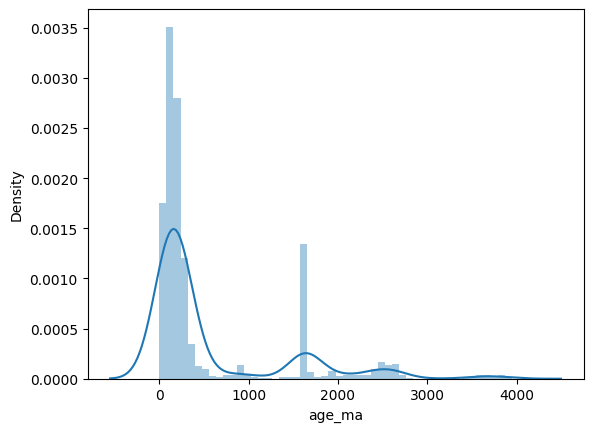

In [66]:
sns.distplot(barren_age['age_ma'])

In [67]:
print(barren_age['age_ma'].mean())

556.6024229734869


In [68]:
print(barren_age['age_ma'].median())

222.0


In [69]:
#fertile_age = sqldf("""
 #                     SELECT age_ma, LOCATION  
  #                    FROM df1
   #                   WHERE Comment = 'Fertility'
    #              """)

In [70]:
import pandas as pd

# Assuming df1 is your DataFrame
# First, filter the DataFrame to include only rows where Comment is 'Fertility'
fertile_age = df1[df1['Comment'] == 'Fertility']

# Then, select the 'age_ma' and 'LOCATION' columns
fertile_age = fertile_age[['age_ma', 'location']]


<Axes: xlabel='age_ma', ylabel='Density'>

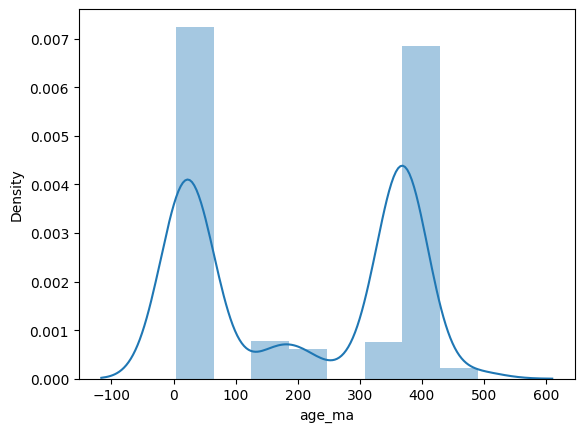

In [71]:
sns.distplot(fertile_age['age_ma'])

<Axes: xlabel='Hf', ylabel='Density'>

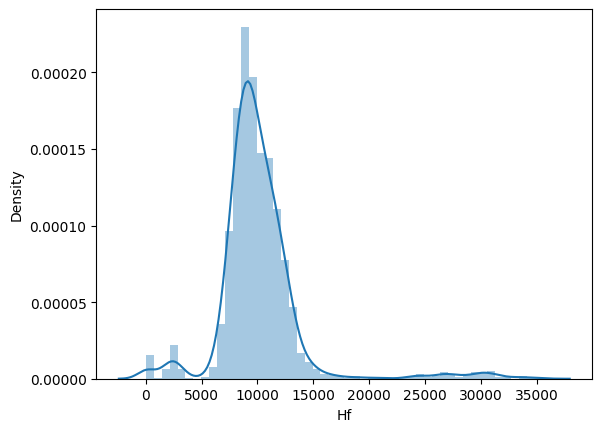

In [72]:
sns.distplot(df1['Hf'])

<Axes: >

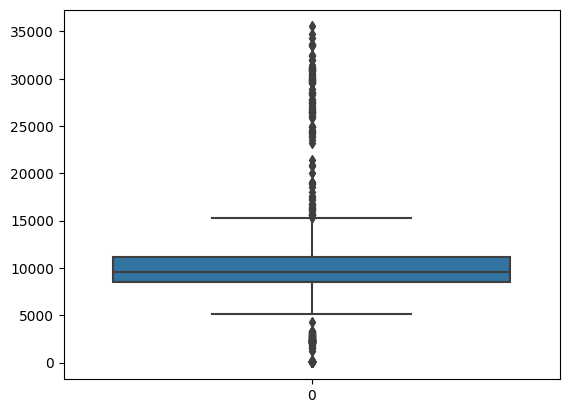

In [73]:
sns.boxplot(df1['Hf'])

In [74]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [75]:
df1.drop(columns=['CITATION', 'rock_name', 'Cu_tonnage_Mt'], inplace=True)

In [76]:
df1.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Comment', 'Feature',
       'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [77]:
df1.isnull().sum().sort_values(ascending=False)

La           923
Pr           256
Ti           255
age_ma       124
Nd            93
Er            79
Tm            78
Y             74
Hf            25
Eu            15
Sm             8
Gd             6
Ce             5
Dy             3
Lu             2
Yb             1
Tb             1
Ho             1
U              0
location       0
latitude       0
Feature        0
Comment        0
longitude      0
Th             0
dtype: int64

In [78]:
def replace_nulls(df, features):
    for feature in features:
        
        feature_median = df1[feature].median()
        
        print(feature, feature_median)
        
        df[feature] = df[feature].fillna(feature_median)
        
    return df

In [79]:
features = ['Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
            'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

In [80]:
df1_copy = df1.copy()

In [81]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

Ti      La     Ce      Pr
0      7.88   0.050   10.5   0.050
1     10.90  69.100  169.0  22.500
2      6.00   0.020   25.1   0.300
3      9.06   0.280   12.0     NaN
4      4.93   0.070   16.5   0.150
...     ...     ...    ...     ...
2983    NaN   0.007    8.0   0.051
2984    NaN   0.013    9.0   0.137
2985    NaN   0.015    9.0   0.172
2986    NaN   0.002    8.0   0.039
2987    NaN   0.056    8.0   0.075

[2988 rows x 4 columns]

In [82]:
df1_copy = replace_nulls(df1_copy, features)

Ti 7.22
La 0.09
Ce 14.8
Pr 0.10560457100000001
Nd 1.47
Sm 2.979013672
Eu 0.6647571
Gd 16.88696182
Tb 5.99
Dy 67.35714722
Ho 28.63898955
Er 133.0
Tm 31.855585745
Yb 326.2416992
Lu 65.088261415
Y 830.1593614000001
Hf 9563.0
U 234.0
Th 118.60787765


In [83]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

Ti      La     Ce         Pr
0      7.88   0.050   10.5   0.050000
1     10.90  69.100  169.0  22.500000
2      6.00   0.020   25.1   0.300000
3      9.06   0.280   12.0   0.105605
4      4.93   0.070   16.5   0.150000
...     ...     ...    ...        ...
2983   7.22   0.007    8.0   0.051000
2984   7.22   0.013    9.0   0.137000
2985   7.22   0.015    9.0   0.172000
2986   7.22   0.002    8.0   0.039000
2987   7.22   0.056    8.0   0.075000

[2988 rows x 4 columns]

In [84]:
df1_copy.isnull().sum()

location       0
latitude       0
longitude      0
age_ma       124
Comment        0
Feature        0
Ti             0
La             0
Ce             0
Pr             0
Nd             0
Sm             0
Eu             0
Gd             0
Tb             0
Dy             0
Ho             0
Er             0
Tm             0
Yb             0
Lu             0
Y              0
Hf             0
U              0
Th             0
dtype: int64

In [85]:
df1_copy.loc[df1_copy['age_ma'].isnull()]

location  latitude  longitude  age_ma Comment  Feature    Ti  \
2864  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2865  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2866  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2867  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2868  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
...                ...       ...        ...     ...     ...      ...   ...   
2983  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2984  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2985  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2986  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   
2987  Chuquicamata-Rad     -22.0      -67.0     NaN  Barren        0  7.22   

         La    Ce     Pr  ...     Dy    Ho     Er    Tm     Yb    Lu       Y  \
2864  0.068  15.0  0.546  ...  153.4  53.7  228.6  46.0  408.0  70.1  1609.0   
2865  0.074  15.0  0.532  ...  164.7  57.2  247.0  50.1  445.0  76.5  1735.0   
2866  0.036  21.0  0.469  ...  153.4  52.1  222.6  46.2  412.0  69.7  1563.0   
2867  0.062  20.0  0.574  ...  153.9  51.9  222.0  45.8  412.0  69.1  1545.0   
2868  0.003  15.0  0.089  ...   92.0  32.7  142.6  30.9  286.0  49.5   988.0   
...     ...   ...    ...  ...    ...   ...    ...   ...    ...   ...     ...   
2983  0.007   8.0  0.051  ...   40.9  14.6   65.3  14.9  137.0  24.8   448.0   
2984  0.013   9.0  0.137  ...   69.5  23.4  102.9  21.9  199.0  34.7   725.0   
2985  0.015   9.0  0.172  ...   69.2  22.9   99.7  21.2  191.0  33.0   693.0   
2986  0.002   8.0  0.039  ...   34.2  12.5   58.2  12.9  123.0  21.9   394.0   
2987  0.056   8.0  0.075  ...   51.7  17.9   81.5  17.9  166.0  28.8   564.0   

           Hf      U     Th  
2864   8515.0  453.0  494.0  
2865   8836.0  445.0  493.0  
2866  10070.0  544.0  533.0  
2867   9855.0  506.0  498.0  
2868  10232.0  312.0  271.0  
...       ...    ...    ...  
2983   8803.0   92.0   66.0  
2984   8854.0  100.0   90.0  
2985   8890.0   97.0   86.0  
2986   9032.0   82.0   55.0  
2987   8773.0   90.0   73.0  

[124 rows x 25 columns]

In [86]:
df1_copy.loc[df1_copy['location'] == 'Chuquicamata-Rad', 'age_ma'] = 35.0

In [87]:
df1_copy.isna().sum()

location     0
latitude     0
longitude    0
age_ma       0
Comment      0
Feature      0
Ti           0
La           0
Ce           0
Pr           0
Nd           0
Sm           0
Eu           0
Gd           0
Tb           0
Dy           0
Ho           0
Er           0
Tm           0
Yb           0
Lu           0
Y            0
Hf           0
U            0
Th           0
dtype: int64

In [88]:

df1.drop(columns=['location', 'latitude', 'longitude'], inplace=True)

In [89]:
df1_copy['Feature'].value_counts()

0    1687
1    1301
Name: Feature, dtype: int64

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [91]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Comment', 'Feature',
       'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [92]:
X = df1_copy.drop(columns = ['Comment', 'Feature', 'location', 'latitude', 'longitude'])   
y = df1_copy['Feature']

In [93]:
X.head()

age_ma     Ti     La     Ce         Pr      Nd     Sm    Eu     Gd    Tb  \
0   222.0   7.88   0.05   10.5   0.050000    4.25  11.60  1.99   61.6  24.5   
1   222.0  10.90  69.10  169.0  22.500000  132.00  41.80  4.34  102.0  32.7   
2   222.0   6.00   0.02   25.1   0.300000    4.41  13.80  2.30   79.9  34.4   
3   222.0   9.06   0.28   12.0   0.105605    1.88   5.08  1.01   33.8  15.5   
4   222.0   4.93   0.07   16.5   0.150000    2.32   8.23  1.52   45.6  19.7   

      Dy     Ho     Er     Tm      Yb     Lu       Y       Hf      U     Th  
0  295.0  125.0  526.0  129.0  1077.0  199.0  2737.0  12390.0  305.0  134.0  
1  361.0  147.0  611.0  148.0  1232.0  228.0  3226.0  12591.0  503.0  272.0  
2  415.0  172.0  701.0  167.0  1358.0  248.0  3675.0  12724.0  639.0  414.0  
3  194.0   83.0  356.0   89.5   762.0  144.0  1832.0  12894.0  308.0  127.0  
4  257.0  108.0  456.0  111.0   936.0  171.0  2355.0  12535.0  348.0  155.0

In [94]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [96]:
type(X_train)

pandas.core.frame.DataFrame

In [97]:
y_train.shape

(2390,)

In [98]:
y_train.sum()

1053

### Perform scaling

In [99]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Before Handling the Outliers

### Logistic Regression Model

In [100]:
lr_model = LogisticRegression()

In [101]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [102]:
y_pred = lr_model.predict(X_test_scaled)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [104]:
accuracy_score(y_test, y_pred)

0.8511705685618729

In [105]:
cm = confusion_matrix(y_test, y_pred)

In [106]:
cm

array([[287,  63],
       [ 26, 222]])

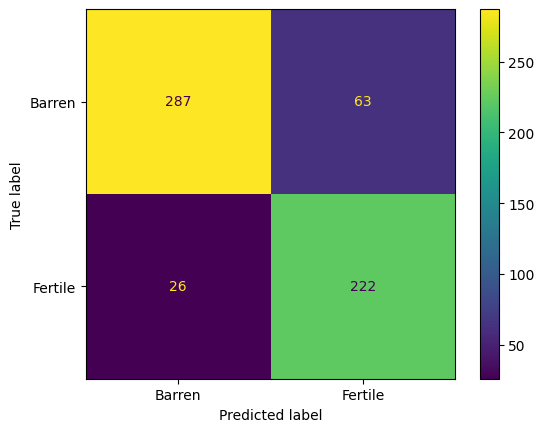

In [107]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

### Handling Outliers

In [108]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Comment', 'Feature',
       'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [109]:
features_with_outliers = ['age_ma',
                           'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
                           'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

### Box-plot before handling outliers

age_ma float64


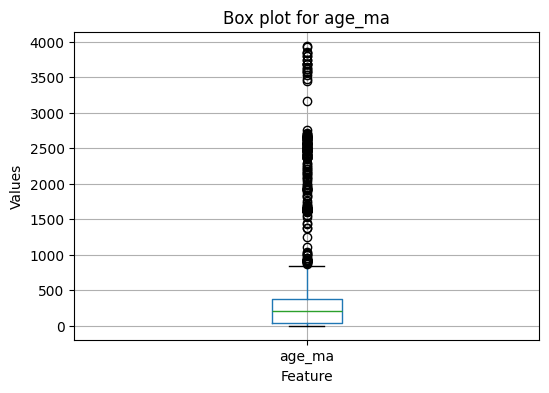

Ti float64


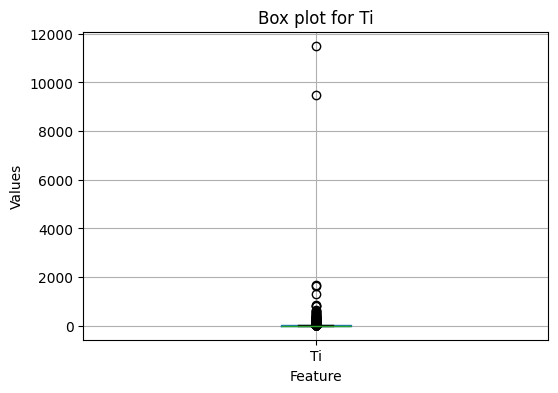

La float64


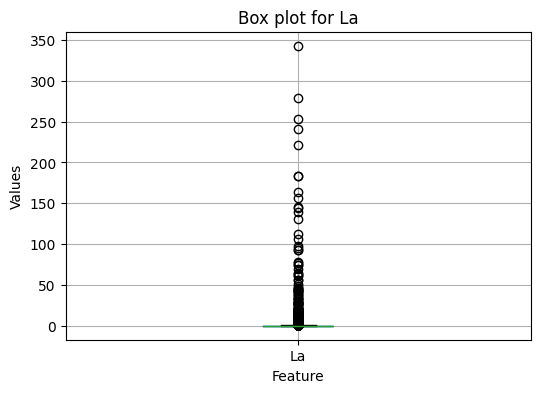

Ce float64


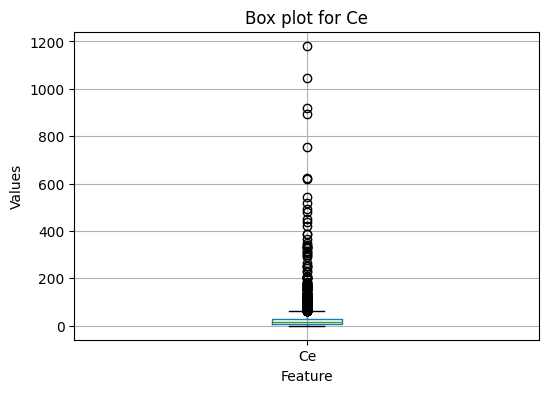

Pr float64


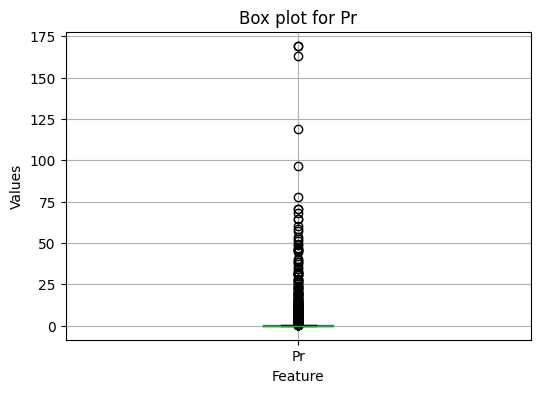

Nd float64


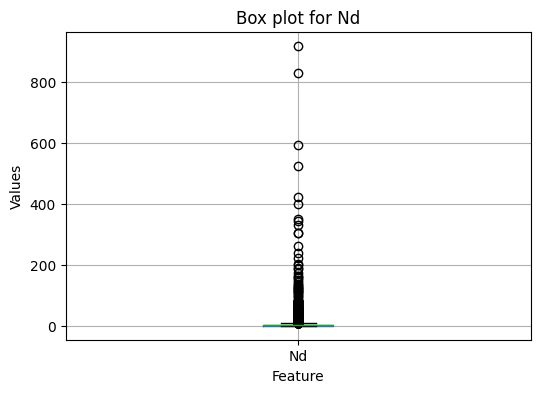

Sm float64


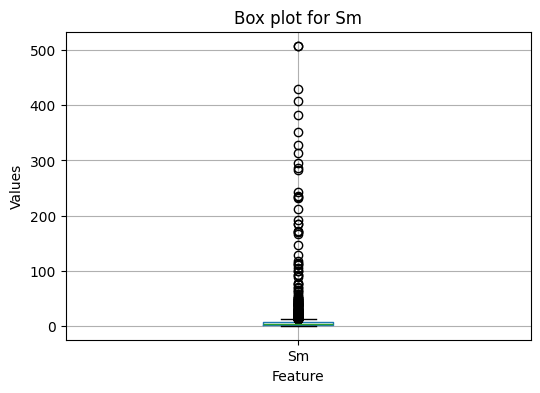

Eu float64


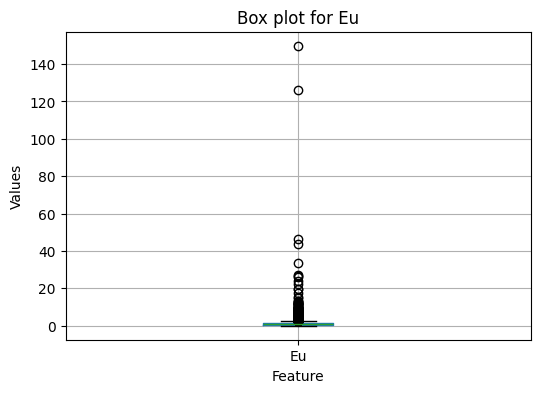

Gd float64


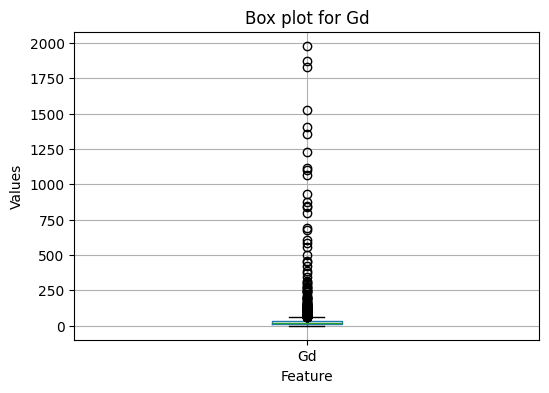

Tb float64


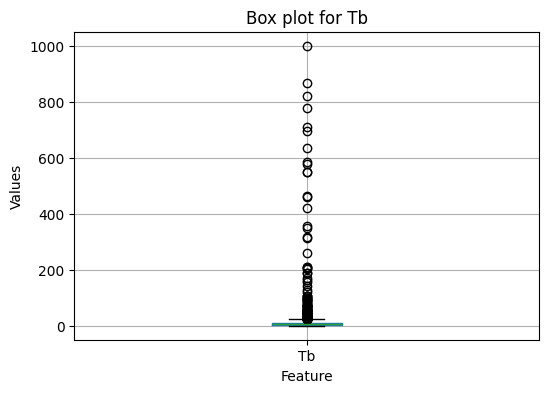

Dy float64


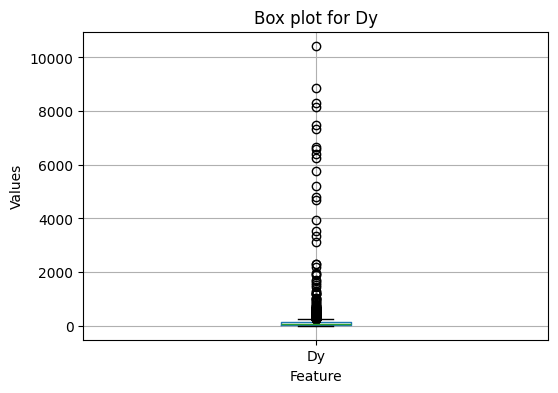

Ho float64


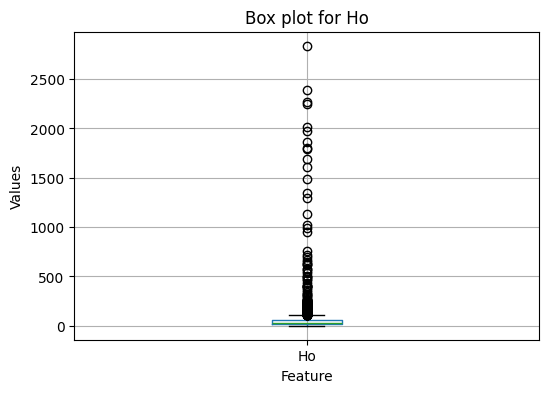

Er float64


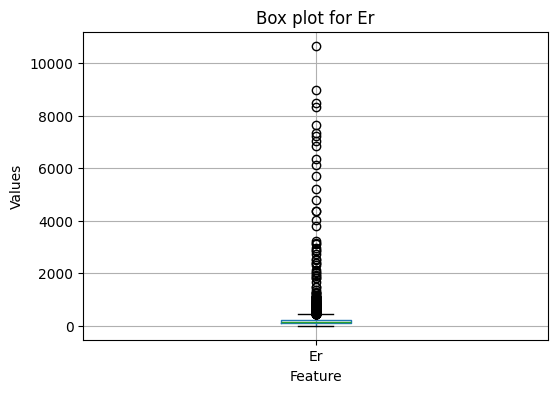

Tm float64


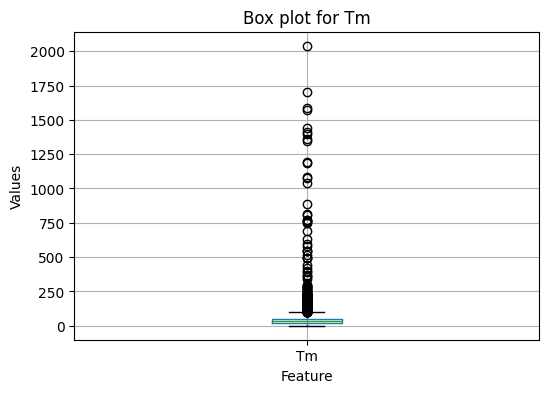

Yb float64


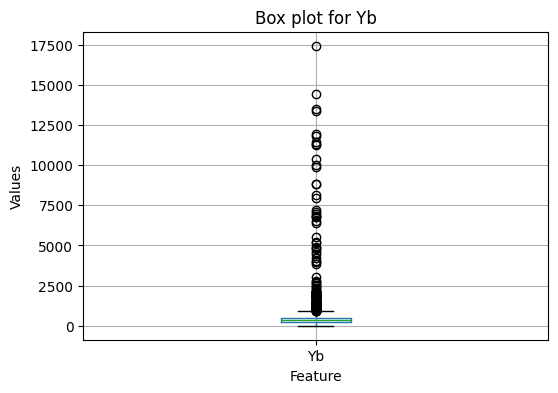

Lu float64


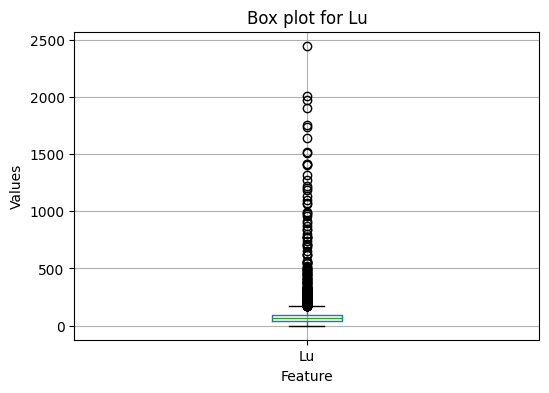

Y float64


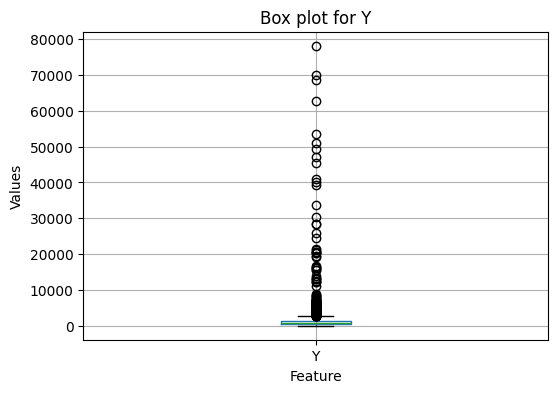

Hf float64


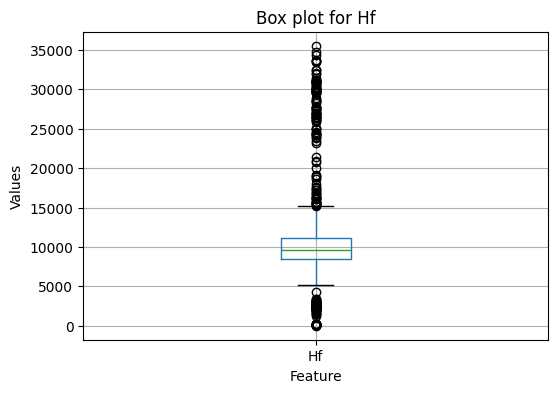

U float64


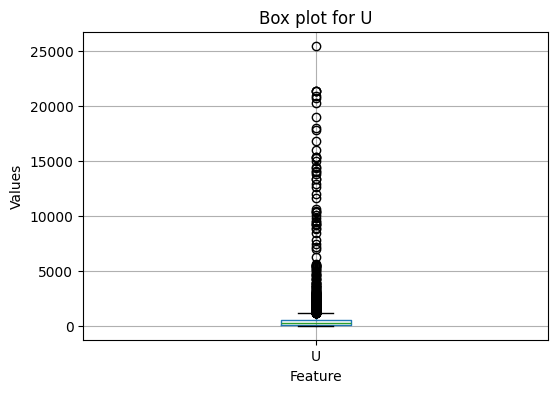

Th float64


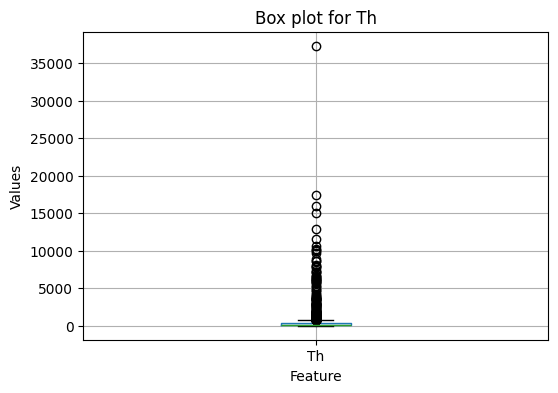

In [110]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

In [111]:
import pandas as pd

def replace_outliers(df):
    # Loop through each column
    for feature in features_with_outliers:
        # Check if the column contains numeric data (integer or float)
        if df[feature].dtype in ['int64', 'float64']:
            # Calculate the first and third quartiles
            q1 = df[feature].quantile(0.25)
            q3 = df[feature].quantile(0.75)
            
            # Calculate the interquartile range (IQR)
            iqr = q3 - q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Replace outliers with the maximum and minimum values of the column
            df[feature] = df[feature].apply(lambda x: max(x, lower_bound) if x < lower_bound 
                                            else min(x, upper_bound) if x > upper_bound 
                                            else x)
    
    return df

In [112]:
df1_copy = replace_outliers(df1_copy)

In [113]:
df1_copy.drop(columns=['location', 'latitude', 'longitude'], inplace=True)

In [114]:
df1_copy.columns

Index(['age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U',
       'Th'],
      dtype='object')

### Box-plots after handling outliers

age_ma float64


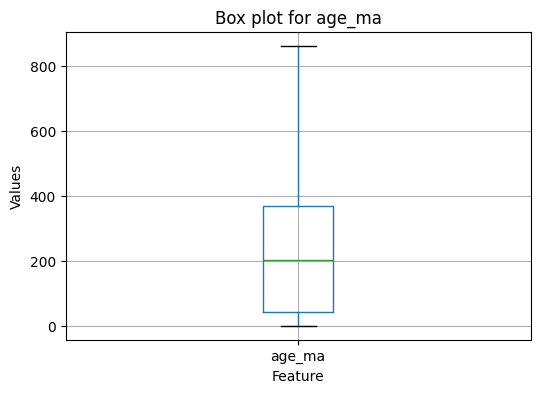

Ti float64


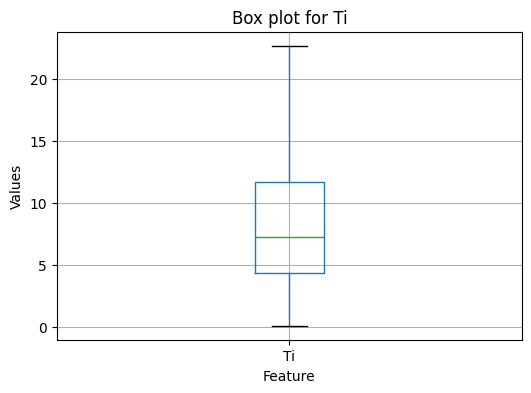

La float64


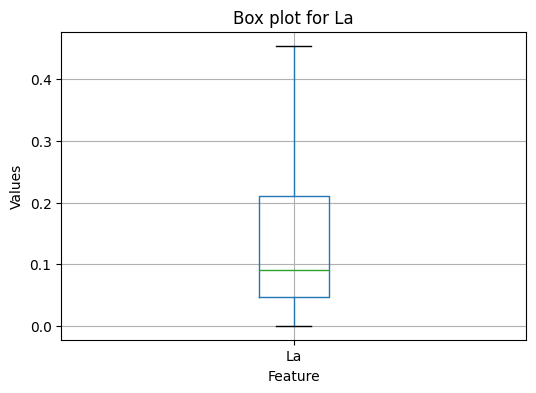

Ce float64


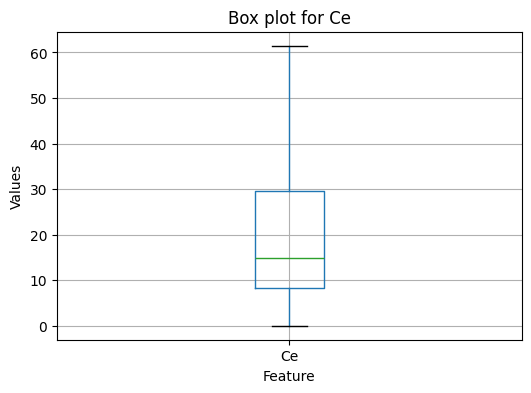

Pr float64


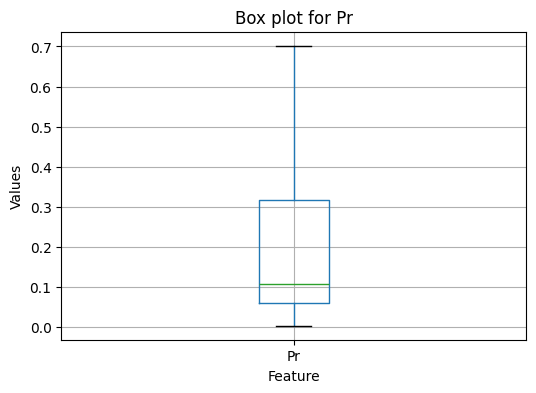

Nd float64


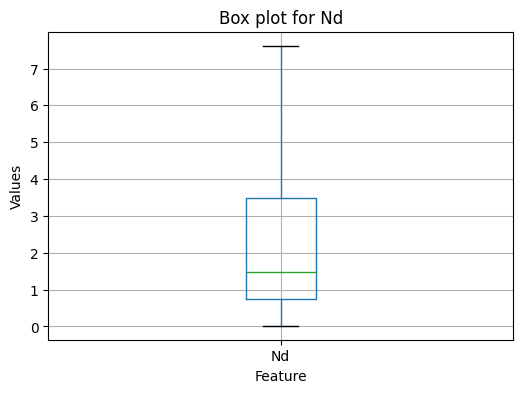

Sm float64


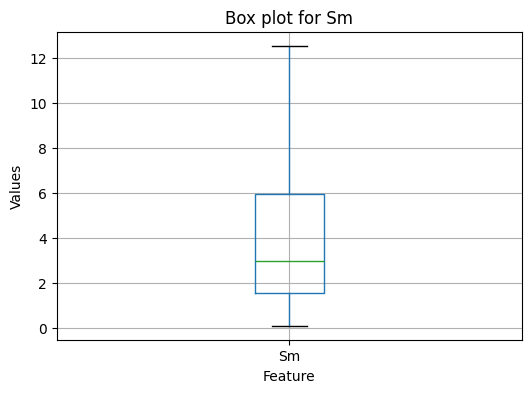

Eu float64


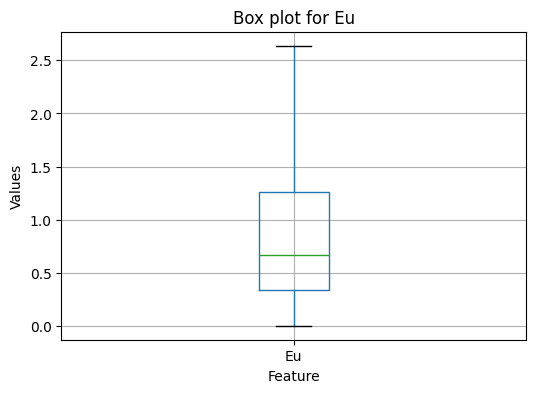

Gd float64


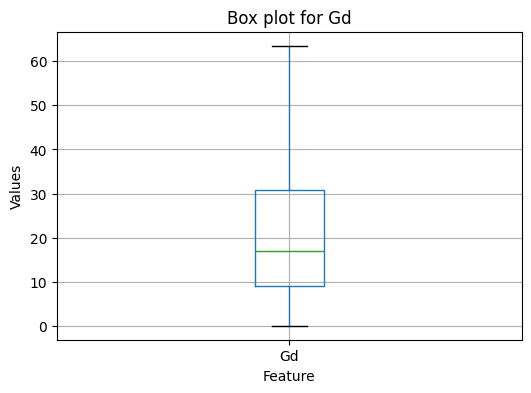

Tb float64


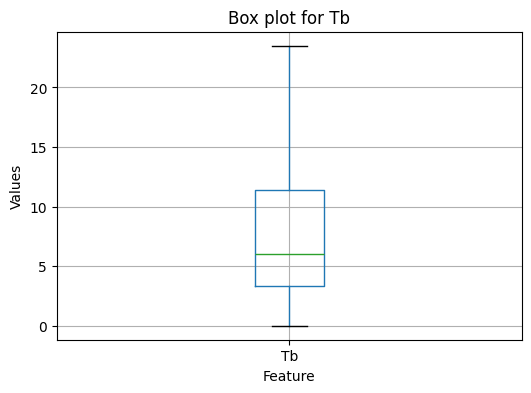

Dy float64


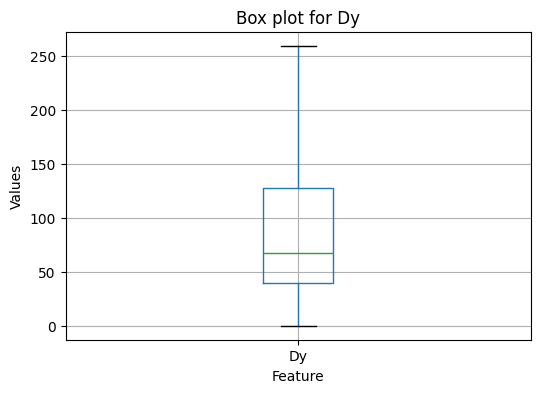

Ho float64


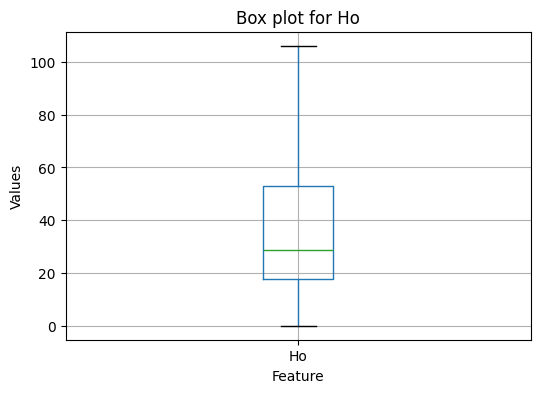

Er float64


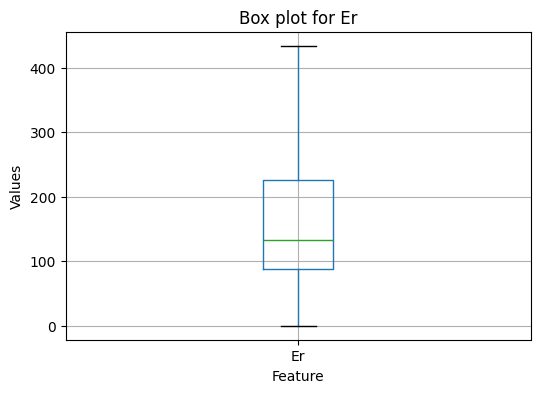

Tm float64


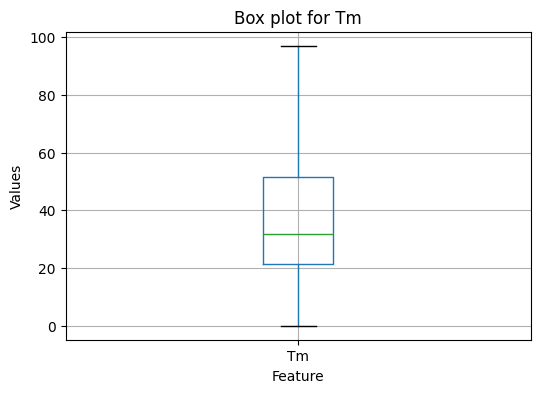

Yb float64


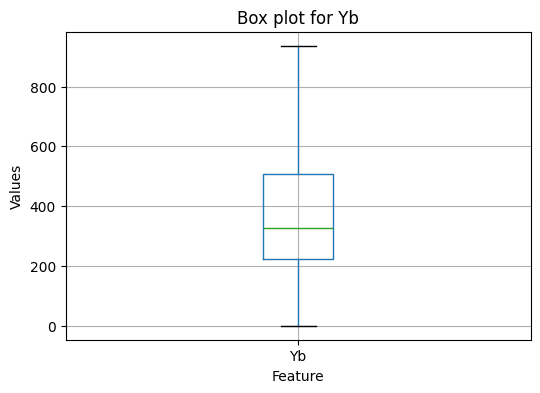

Lu float64


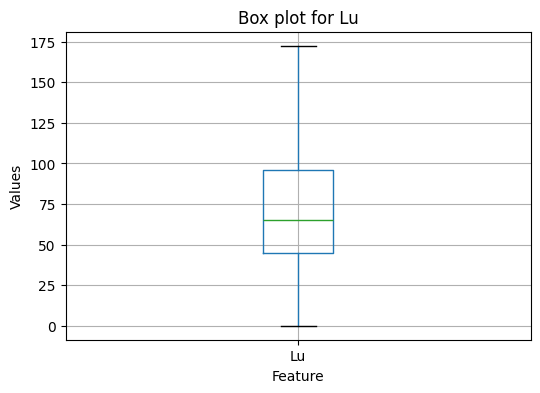

Y float64


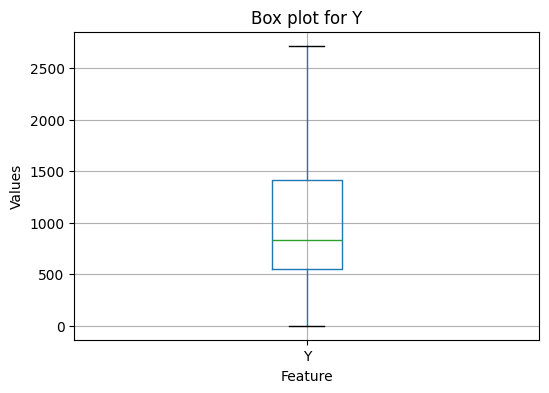

Hf float64


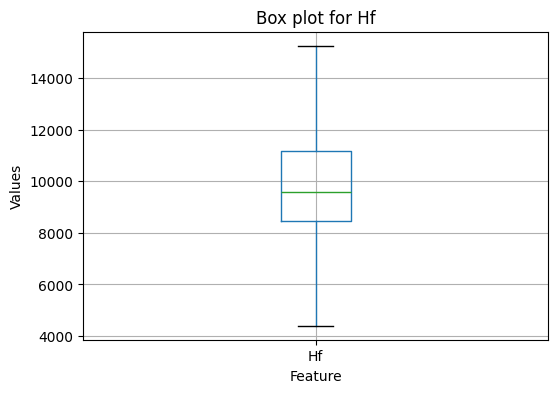

U float64


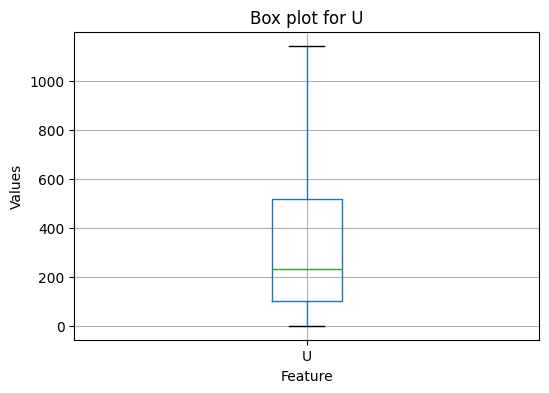

Th float64


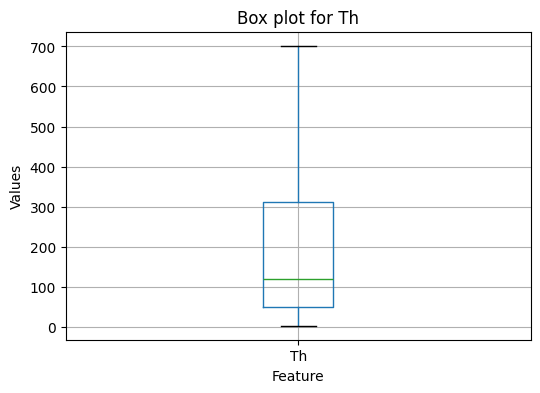

In [115]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

### Creating a new cluster ID column replacing latitude and longitude

In [116]:
df1_copy.columns

Index(['age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U',
       'Th'],
      dtype='object')

In [117]:
df1_copy.isnull().sum()

age_ma     0
Comment    0
Feature    0
Ti         0
La         0
Ce         0
Pr         0
Nd         0
Sm         0
Eu         0
Gd         0
Tb         0
Dy         0
Ho         0
Er         0
Tm         0
Yb         0
Lu         0
Y          0
Hf         0
U          0
Th         0
dtype: int64

### Sample ML Model testing

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [119]:
df1_copy.columns

Index(['age_ma', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U',
       'Th'],
      dtype='object')

In [120]:
X = df1_copy.drop(columns = ['Comment', 'Feature'])
y = df1_copy['Feature']

In [121]:
X.head()

age_ma     Ti      La         Ce        Pr        Nd         Sm        Eu  \
0   222.0   7.88  0.0500  10.500000  0.050000  4.250000  11.600000  1.990000   
1   222.0  10.90  0.4545  61.474347  0.701901  7.618805  12.540955  2.637494   
2   222.0   6.00  0.0200  25.100000  0.300000  4.410000  12.540955  2.300000   
3   222.0   9.06  0.2800  12.000000  0.105605  1.880000   5.080000  1.010000   
4   222.0   4.93  0.0700  16.500000  0.150000  2.320000   8.230000  1.520000   

          Gd         Tb          Dy        Ho         Er         Tm  \
0  61.600000  23.495933  259.214141  106.1375  434.18329  97.083086   
1  63.498619  23.495933  259.214141  106.1375  434.18329  97.083086   
2  63.498619  23.495933  259.214141  106.1375  434.18329  97.083086   
3  33.800000  15.500000  194.000000   83.0000  356.00000  89.500000   
4  45.600000  19.700000  257.000000  106.1375  434.18329  97.083086   

           Yb          Lu            Y       Hf      U     Th  
0  936.724661  172.530636  2716.955779  12390.0  305.0  134.0  
1  936.724661  172.530636  2716.955779  12591.0  503.0  272.0  
2  936.724661  172.530636  2716.955779  12724.0  639.0  414.0  
3  762.000000  144.000000  1832.000000  12894.0  308.0  127.0  
4  936.000000  171.000000  2355.000000  12535.0  348.0  155.0

In [122]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [124]:
type(X_train)

pandas.core.frame.DataFrame

In [125]:
y_train.shape

(2390,)

In [126]:
y_train.sum()

1034

### Perform scaling

In [127]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building after handling the outliers

### Logistic Regression Model

In [128]:
lr_model = LogisticRegression()

In [129]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [130]:
y_pred = lr_model.predict(X_test_scaled)

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
accuracy_score(y_test, y_pred)

0.8913043478260869

In [133]:
cm = confusion_matrix(y_test, y_pred)

In [134]:
cm

array([[286,  45],
       [ 20, 247]])

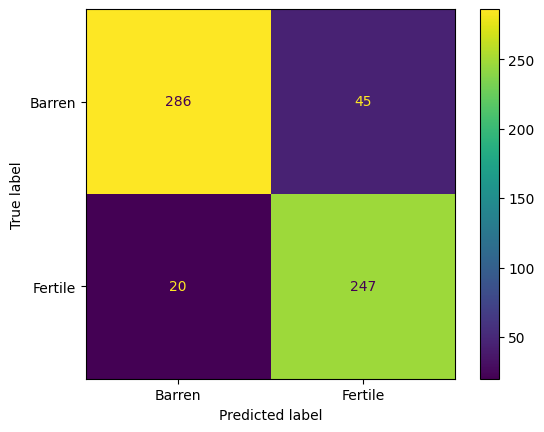

In [135]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

In [136]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9346    0.8640    0.8980       331
   Fertility     0.8459    0.9251    0.8837       267

    accuracy                         0.8913       598
   macro avg     0.8903    0.8946    0.8908       598
weighted avg     0.8950    0.8913    0.8916       598



## Feature Importance and Selection

### Recurssive Feature Elimination

In [137]:
from sklearn.feature_selection import RFE

# Initialize Logistic Regression model
lr_model = LogisticRegression()

# Initialize RFE
rfe = RFE(lr_model, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_})
feature_ranking.sort_values(by='Rank')


Feature  Rank
10      Dy     1
12      Er     2
4       Pr     3
7       Eu     4
13      Tm     5
16       Y     6
15      Lu     7
5       Nd     8
8       Gd     9
17      Hf    10
6       Sm    11
14      Yb    12
3       Ce    13
2       La    14
11      Ho    15
1       Ti    16
9       Tb    17
0   age_ma    18
18       U    19
19      Th    20

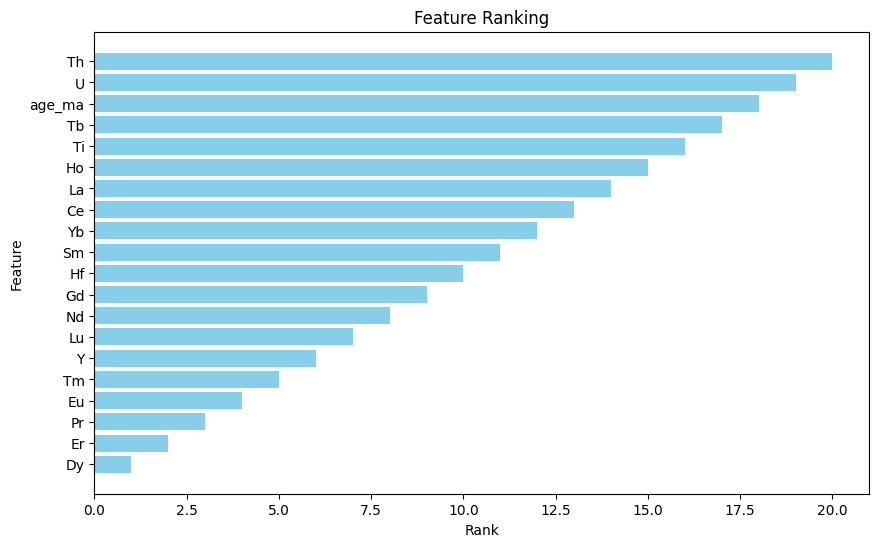

In [138]:
import matplotlib.pyplot as plt

# Sort the feature ranking dataframe by rank
sorted_feature_ranking = feature_ranking.sort_values(by='Rank', ascending=False)

# Plotting the feature ranking
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_ranking['Feature'], sorted_feature_ranking['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rank at the top
plt.show()

### Random Forest Feature Importance

In [139]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit Random Forest
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False)

Feature  Importance
0   age_ma    0.133544
10      Dy    0.091063
17      Hf    0.084158
18       U    0.081639
5       Nd    0.071033
7       Eu    0.070728
6       Sm    0.061829
4       Pr    0.058836
2       La    0.049692
3       Ce    0.046252
19      Th    0.042614
15      Lu    0.032908
1       Ti    0.032479
9       Tb    0.024982
8       Gd    0.024133
14      Yb    0.020994
16       Y    0.020419
13      Tm    0.017990
12      Er    0.017556
11      Ho    0.017153

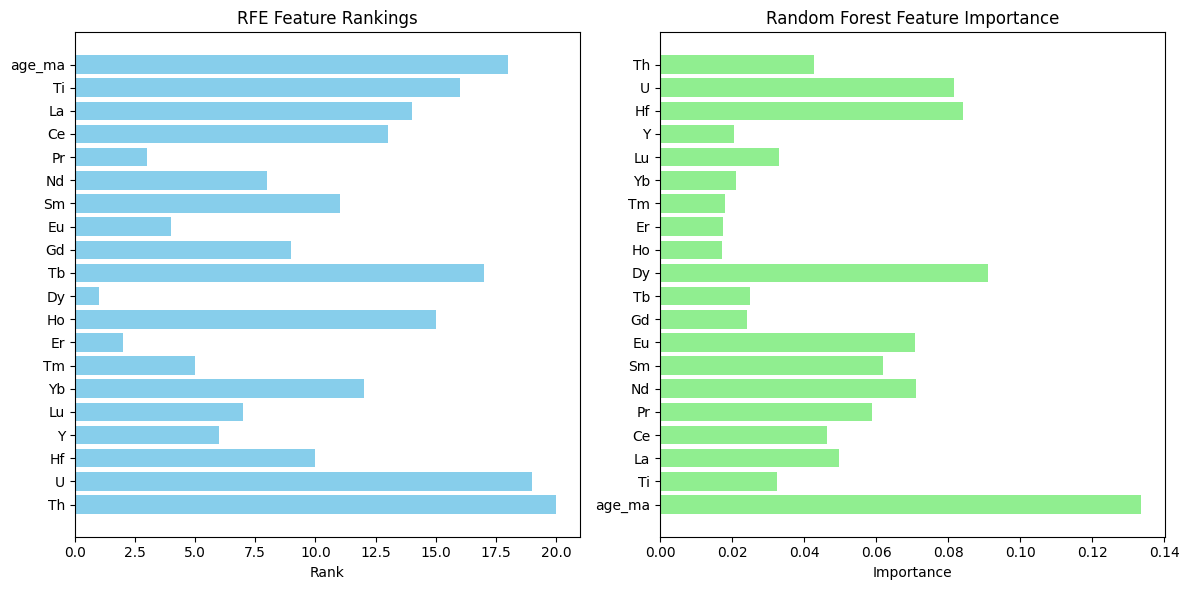

In [140]:
import matplotlib.pyplot as plt

# Merge feature rankings and importances
merged_features = pd.merge(feature_ranking, feature_importances, on='Feature', how='inner')

# Plotting
plt.figure(figsize=(12, 6))

# Plotting RFE rankings
plt.subplot(1, 2, 1)
plt.barh(merged_features['Feature'], merged_features['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.title('RFE Feature Rankings')
plt.gca().invert_yaxis()

# Plotting feature importances
plt.subplot(1, 2, 2)
plt.barh(merged_features['Feature'], merged_features['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

## Logistic Regression Model implemenation using important features

In [141]:
# Select important features based on importance scores
important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']




In [142]:
# Filter the dataset to include only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]



In [143]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [144]:
# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [145]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)

In [146]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [147]:
# Display confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[286  45]
 [ 20 247]]

Accuracy: 0.8913043478260869


In [148]:
conf_matrix

array([[286,  45],
       [ 20, 247]])

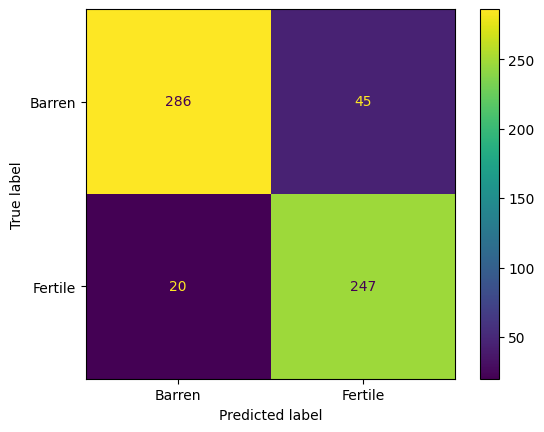

In [149]:
ConfusionMatrixDisplay(conf_matrix, display_labels=['Barren', 'Fertile']).plot()